<a href="https://colab.research.google.com/github/katewall/2023class_size_predictions/blob/main/school_prediction_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U kaleido
import kaleido
import pandas as pd
import os
import plotly.graph_objects as go
import numpy as np

#Additional data sources, 4 year graduation rates for UT System and AM System extracted from txhigheredaccountability
#http://www.txhigheredaccountability.org/AcctPublic/InteractiveReport/AddReport
working_dir = '/content/drive/MyDrive/AA: Writing/school challenge/'
tab_nc = 'table_IES_NCES.csv'
tab_ut = 'table_UTsystem.csv'
tab_am = 'table_AMsystem.csv'
source = 'Enrol_pred_master_data.csv'

df = pd.read_csv(os.path.join(working_dir, source))
supp_nc = pd.read_csv(os.path.join(working_dir, tab_nc), header=0)
supp_ut = pd.read_csv(os.path.join(working_dir, tab_ut), header=1)
supp_am = pd.read_csv(os.path.join(working_dir, tab_am), header=1)

df.drop(columns='Unnamed: 0',inplace= True)
df.fillna(9999, inplace=True)
df

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 4.8 MB/s eta 0:00:00


,Term,Year,Y1,Y2,Y3,Y4,admitted.students.BaDS.MS,accepted.offer.of.admission.BaDS.MS,enrolled.students.BaDS.MS,admitted.students.BaDS.PHD,...,enrolled.students.HPBS.PHD,admitted.students.HPBS.MPH,accepted.offer.of.admission.HPBS.MPH,enrolled.students.HPBS.MPH,admitted.students.MPCH.PHD,accepted.offer.of.admission.MPCH.PHD,enrolled.students.MPCH.PHD,admitted.students.MPCH.MPH,accepted.offer.of.admission.MPCH.MPH,enrolled.students.MPCH.MPH
0,2153,2015,139,38,9999.0,9999.0,29,8,5,21,...,10,122,66,54,34,19,19,103,51,38
1,2161,2016,122,85,9999.0,9999.0,0,0,0,0,...,1,12,9,9,2,2,1,15,11,9
2,2162,2016,80,24,9999.0,9999.0,0,0,0,0,...,1,3,3,2,3,3,3,2,2,2
3,2163,2016,153,49,9999.0,9999.0,45,11,11,33,...,26,112,55,45,23,19,14,101,38,29
4,2171,2017,92,94,9999.0,9999.0,2,2,2,2,...,0,7,7,7,3,2,1,12,9,8
5,2172,2017,97,23,9999.0,9999.0,0,0,0,0,...,0,3,3,2,4,4,4,3,3,3
6,2173,2017,246,57,36.0,9999.0,33,13,11,43,...,17,132,65,56,27,21,18,84,43,36
7,2181,2018,129,113,9999.0,22.0,0,0,0,1,...,0,13,10,9,1,1,1,11,10,9
8,2182,2018,95,24,9999.0,9999.0,0,0,0,0,...,0,0,0,0,3,3,3,2,2,2
9,2183,2018,207,92,36.0,9999.0,48,13,8,66,...,20,111,66,51,36,26,20,90,50,34


In [ ]:
course_names = {'Y1': 'PHM_1690', 'Y2': 'PH_1700', 'Y3': 'PH_1975', 'Y4': 'PH_1976'}
semester_names = {'1': 'Spring', '2': 'Summer', '3': 'Fall'}
df.rename(columns=course_names, inplace=True)
df['Semester_num'] = df['Term'].astype('string').str.slice(start=3)
df['Semester'] = df['Semester_num'].map(semester_names)
df[['Term','Semester_num','Semester']].head()

,Term,Semester_num,Semester
0,2153,3,Fall
1,2161,1,Spring
2,2162,2,Summer
3,2163,3,Fall
4,2171,1,Spring


In [ ]:
df['accept_BaDS'] = df['accepted.offer.of.admission.BaDS.MS'] + df['accepted.offer.of.admission.BaDS.PHD'] + df['accepted.offer.of.admission.BaDS.MPH']
df['accept_EHGES'] = df['accepted.offer.of.admission.EHGES.MS'] + df['accepted.offer.of.admission.EHGES.PHD'] + df['accepted.offer.of.admission.EHGES.MPH']
df['accept_HPBS'] = df['accepted.offer.of.admission.HPBS.PHD'] + df['accepted.offer.of.admission.HPBS.MPH']
df['accept_MPCH'] = df['accepted.offer.of.admission.MPCH.PHD'] + df['accepted.offer.of.admission.MPCH.MPH']
df['enroll_BaDS'] = df['enrolled.students.BaDS.MS'] + df['enrolled.students.BaDS.PHD'] + df['enrolled.students.BaDS.MPH']
df['enroll_EHGES'] = df['enrolled.students.EHGES.MS'] + df['enrolled.students.EHGES.PHD'] + df['enrolled.students.EHGES.MPH']
df['enroll_HPBS'] = df['enrolled.students.HPBS.PHD'] + df['enrolled.students.HPBS.MPH']
df['enroll_MPCH'] = df['enrolled.students.MPCH.PHD'] + df['enrolled.students.MPCH.MPH']
df

,Term,Year,PHM_1690,PH_1700,PH_1975,PH_1976,admitted.students.BaDS.MS,accepted.offer.of.admission.BaDS.MS,enrolled.students.BaDS.MS,admitted.students.BaDS.PHD,...,Semester_num,Semester,accept_BaDS,accept_EHGES,accept_HPBS,accept_MPCH,enroll_BaDS,enroll_EHGES,enroll_HPBS,enroll_MPCH
0,2153,2015,139,38,9999.0,9999.0,29,8,5,21,...,3,Fall,20,126,80,70,12,103,64,57
1,2161,2016,122,85,9999.0,9999.0,0,0,0,0,...,1,Spring,2,23,10,13,1,18,10,10
2,2162,2016,80,24,9999.0,9999.0,0,0,0,0,...,2,Summer,1,4,4,5,1,3,3,5
3,2163,2016,153,49,9999.0,9999.0,45,11,11,33,...,3,Fall,34,143,82,57,29,115,71,43
4,2171,2017,92,94,9999.0,9999.0,2,2,2,2,...,1,Spring,5,15,7,11,5,15,7,9
5,2172,2017,97,23,9999.0,9999.0,0,0,0,0,...,2,Summer,0,5,4,7,0,4,2,7
6,2173,2017,246,57,36.0,9999.0,33,13,11,43,...,3,Fall,39,142,87,64,32,114,73,54
7,2181,2018,129,113,9999.0,22.0,0,0,0,1,...,1,Spring,3,19,10,11,3,18,9,10
8,2182,2018,95,24,9999.0,9999.0,0,0,0,0,...,2,Summer,0,6,0,5,0,6,0,5
9,2183,2018,207,92,36.0,9999.0,48,13,8,66,...,3,Fall,49,164,91,76,33,124,71,54


In [ ]:
possible_predictors = ['accept_BaDS', 'accept_EHGES', 'accept_HPBS','accept_MPCH','enroll_BaDS','enroll_EHGES','enroll_HPBS','enroll_MPCH']
leadinguprates = df[(df['Semester'] == 'Spring') | (df['Semester'] == 'Summer')][['Year']+possible_predictors].groupby(['Year']).sum()
leadinguprates.columns = ['pre_'+i for i in leadinguprates.columns]
leadinguprates.reset_index(drop=False, inplace=True)
leadinguprates

,Year,pre_accept_BaDS,pre_accept_EHGES,pre_accept_HPBS,pre_accept_MPCH,pre_enroll_BaDS,pre_enroll_EHGES,pre_enroll_HPBS,pre_enroll_MPCH
0,2016,3,27,14,18,2,21,13,15
1,2017,5,20,11,18,5,19,9,16
2,2018,3,25,10,16,3,24,9,15
3,2019,4,27,21,15,4,24,19,10
4,2020,7,32,27,23,4,29,27,22
5,2021,5,48,16,19,4,43,15,17
6,2022,3,35,13,12,2,29,11,9
7,2023,2,21,8,8,1,14,6,7


In [ ]:
falldf = pd.merge(df[df['Semester'] == 'Fall'], leadinguprates, on='Year', how='outer')
falldf_raw = falldf.copy(deep=True)
falldf_pred = falldf.copy(deep=True)

In [ ]:
falldf_raw

,Term,Year,PHM_1690,PH_1700,PH_1975,PH_1976,admitted.students.BaDS.MS,accepted.offer.of.admission.BaDS.MS,enrolled.students.BaDS.MS,admitted.students.BaDS.PHD,...,enroll_HPBS,enroll_MPCH,pre_accept_BaDS,pre_accept_EHGES,pre_accept_HPBS,pre_accept_MPCH,pre_enroll_BaDS,pre_enroll_EHGES,pre_enroll_HPBS,pre_enroll_MPCH
0,2153.0,2015,139.0,38.0,9999.0,9999.0,29.0,8.0,5.0,21.0,...,64.0,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2163.0,2016,153.0,49.0,9999.0,9999.0,45.0,11.0,11.0,33.0,...,71.0,43.0,3.0,27.0,14.0,18.0,2.0,21.0,13.0,15.0
2,2173.0,2017,246.0,57.0,36.0,9999.0,33.0,13.0,11.0,43.0,...,73.0,54.0,5.0,20.0,11.0,18.0,5.0,19.0,9.0,16.0
3,2183.0,2018,207.0,92.0,36.0,9999.0,48.0,13.0,8.0,66.0,...,71.0,54.0,3.0,25.0,10.0,16.0,3.0,24.0,9.0,15.0
4,2193.0,2019,225.0,79.0,64.0,9999.0,42.0,15.0,12.0,72.0,...,72.0,52.0,4.0,27.0,21.0,15.0,4.0,24.0,19.0,10.0
5,2203.0,2020,302.0,96.0,58.0,9999.0,43.0,18.0,14.0,74.0,...,132.0,104.0,7.0,32.0,27.0,23.0,4.0,29.0,27.0,22.0
6,2213.0,2021,313.0,111.0,91.0,9999.0,63.0,28.0,17.0,171.0,...,99.0,94.0,5.0,48.0,16.0,19.0,4.0,43.0,15.0,17.0
7,2223.0,2022,217.0,108.0,50.0,9999.0,60.0,16.0,14.0,121.0,...,66.0,74.0,3.0,35.0,13.0,12.0,2.0,29.0,11.0,9.0
8,NaN,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,21.0,8.0,8.0,1.0,14.0,6.0,7.0


In [ ]:
falldf.set_index('Year', inplace=True)
falldf.loc[2020,'PHM_1690'] = falldf.loc[2020,'PHM_1690']* 0.85
falldf.loc[2021,'PHM_1690'] = falldf.loc[2021,'PHM_1690']* 0.85
falldf.reset_index(drop=False, inplace=True)

In [ ]:
falldf

,Year,Term,PHM_1690,PH_1700,PH_1975,PH_1976,admitted.students.BaDS.MS,accepted.offer.of.admission.BaDS.MS,enrolled.students.BaDS.MS,admitted.students.BaDS.PHD,...,enroll_HPBS,enroll_MPCH,pre_accept_BaDS,pre_accept_EHGES,pre_accept_HPBS,pre_accept_MPCH,pre_enroll_BaDS,pre_enroll_EHGES,pre_enroll_HPBS,pre_enroll_MPCH
0,2015,2153.0,139.00,38.0,9999.0,9999.0,29.0,8.0,5.0,21.0,...,64.0,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,2163.0,153.00,49.0,9999.0,9999.0,45.0,11.0,11.0,33.0,...,71.0,43.0,3.0,27.0,14.0,18.0,2.0,21.0,13.0,15.0
2,2017,2173.0,246.00,57.0,36.0,9999.0,33.0,13.0,11.0,43.0,...,73.0,54.0,5.0,20.0,11.0,18.0,5.0,19.0,9.0,16.0
3,2018,2183.0,207.00,92.0,36.0,9999.0,48.0,13.0,8.0,66.0,...,71.0,54.0,3.0,25.0,10.0,16.0,3.0,24.0,9.0,15.0
4,2019,2193.0,225.00,79.0,64.0,9999.0,42.0,15.0,12.0,72.0,...,72.0,52.0,4.0,27.0,21.0,15.0,4.0,24.0,19.0,10.0
5,2020,2203.0,256.70,96.0,58.0,9999.0,43.0,18.0,14.0,74.0,...,132.0,104.0,7.0,32.0,27.0,23.0,4.0,29.0,27.0,22.0
6,2021,2213.0,266.05,111.0,91.0,9999.0,63.0,28.0,17.0,171.0,...,99.0,94.0,5.0,48.0,16.0,19.0,4.0,43.0,15.0,17.0
7,2022,2223.0,217.00,108.0,50.0,9999.0,60.0,16.0,14.0,121.0,...,66.0,74.0,3.0,35.0,13.0,12.0,2.0,29.0,11.0,9.0
8,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,21.0,8.0,8.0,1.0,14.0,6.0,7.0


# Generating Visuals

<Axes: xlabel='Year', ylabel='PHM_1690'>

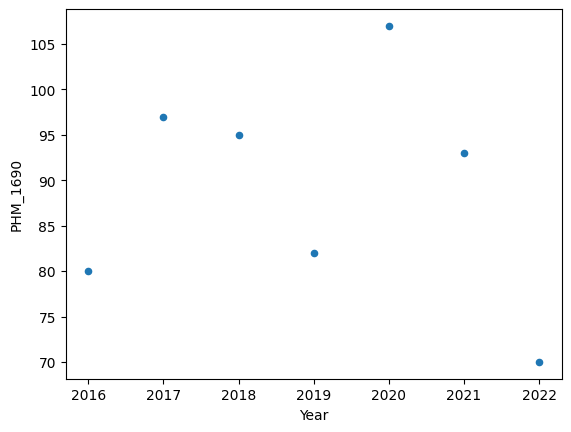

In [ ]:
df[df['Semester']== 'Summer'].plot('Year','PHM_1690','scatter')

<Axes: xlabel='Year', ylabel='PHM_1690'>

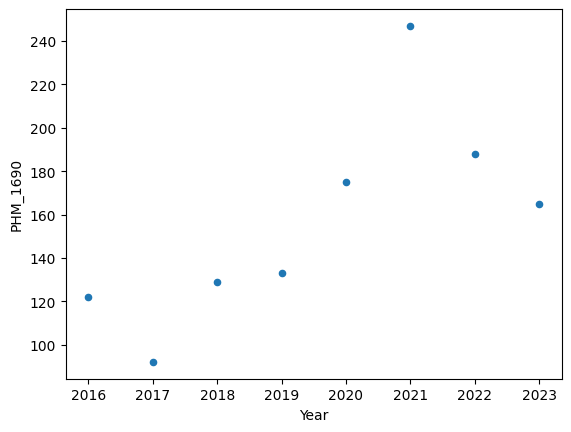

In [ ]:
df[df['Semester']== 'Spring'].plot('Year','PHM_1690','scatter')

<Axes: xlabel='Year', ylabel='PHM_1690'>

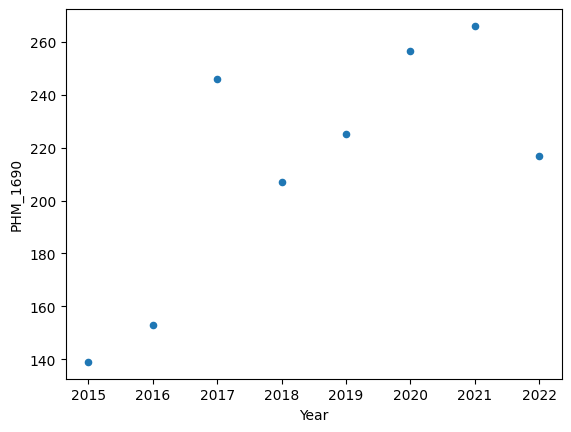

In [ ]:
falldf.plot(x='Year', y='PHM_1690',kind='scatter')

<Axes: xlabel='Year', ylabel='PH_1700'>

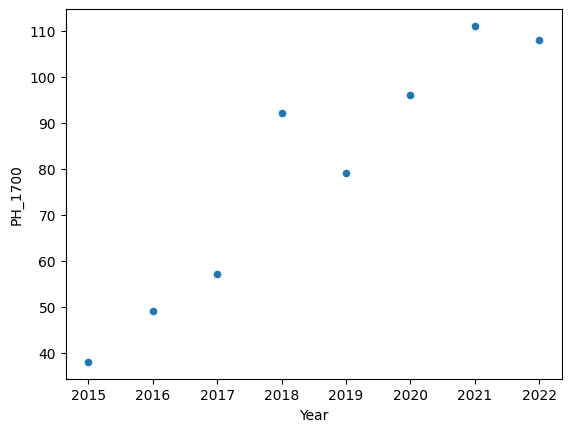

In [ ]:
falldf.plot(x='Year', y='PH_1700',kind='scatter')

In [ ]:
falldf = falldf[falldf['Year'].isin(np.arange(2015, 2023))]

In [ ]:
trace1 = go.Scatter(
  x= falldf_raw['Year'],
  y= falldf_raw['PHM_1690'],
  fill= 'tozeroy',
  #fillcolor= '#5aabdd',
  opacity= 0.6,
  type= 'scatter',
  mode= 'none',
  name= 'Deflated Data'
)

trace2 = go.Scatter(
  x= falldf['Year'],
  y= falldf['PHM_1690'],
  fill= 'tonexty',
  #fillcolor= '#c78bff',
  #opacity= 0.6,
  type= 'scatter',
  mode= 'text',
  name= 'Raw Data',
  text = falldf['PHM_1690'].astype('int').to_list(),
  textposition= ['top right']+ ['top left'] + ['top center']*5 + ['top right'],
  textfont=dict(color='#a7aef8', family='arial', size=14),
)

fig = go.Figure()
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.update_layout(
  title= 'PHM 1690 Class Size 2015 - 2022',
  xaxis_title='Year',
  yaxis_title='Headcount',
  legend=dict(orientation='h')
)
fig.add_annotation(x=2020, y=302,
            text="302",
            font=dict(color='#f7aea5'),
            showarrow=False,
            yshift=10)
fig.add_annotation(x=2021, y=313,
            text="313",
            font=dict(color='#f7aea5'),
            showarrow=False,
            yshift=10)
fig.write_image('/content/fig1690.png', engine='kaleido')
fig.show()

In [ ]:
trace1 = go.Scatter(
  x= falldf['Year'],
  y= falldf['PH_1700'],
  fill= 'tozeroy',
  #fillcolor= '#5aabdd',
  opacity= 0.6,
  type= 'scatter',
  mode= 'text',
  name= 'Deflated Data',
  text = falldf['PH_1700'].astype('int').to_list(),
  textposition= ['top right'] + ['top center']*6 + ['top left'],
  textfont=dict(color='#a7aef8', family='arial', size=14),
)

fig = go.Figure()
fig.add_trace(trace1)
#fig.add_trace(trace2)
fig.update_layout(
  title= 'PH 1700 Class Size 2015 - 2022',
  xaxis_title='Year',
  yaxis_title='Headcount',
  legend=dict(orientation='h')
)
fig.write_image('/content/fig1700.png', engine='kaleido')
fig.show()

# Generating Data For Prediction Models

In [ ]:
# ADD SUPPLEMENTARY DATA
falldf = falldf_pred[falldf_pred['Year'].isin(np.arange(2016, 2024))] #cut off 2015, add back in 2023 measures
supp_ut.rename(columns={'Pct': 'Pct_ut'}, inplace=True)
supp_am.rename(columns={'Pct': 'Pct_am'}, inplace=True)
supp_nc.rename(columns={'Female': 'Grd_fem', 'Male': 'Grd_mal'}, inplace=True)
falldf_raw.rename(columns={'PHM_1690': 'PHM_1690_raw'}, inplace=True)
merged = pd.merge(falldf, supp_ut[['DimYear','Pct_ut']], left_on='Year', right_on='DimYear',how='left')
merged = pd.merge(merged, supp_am[['DimYear','Pct_am']], left_on='Year', right_on='DimYear',how='left')
merged = pd.merge(merged, supp_nc[['Year', 'Grd_fem', 'Grd_mal']], on='Year', how='left')
merged = pd.merge(merged, falldf_raw[['Year', 'PHM_1690_raw']], on='Year', how='left')
merged.drop(columns=['DimYear_x','DimYear_y'], inplace=True)
merged

,Term,Year,PHM_1690,PH_1700,PH_1975,PH_1976,admitted.students.BaDS.MS,accepted.offer.of.admission.BaDS.MS,enrolled.students.BaDS.MS,admitted.students.BaDS.PHD,...,pre_accept_MPCH,pre_enroll_BaDS,pre_enroll_EHGES,pre_enroll_HPBS,pre_enroll_MPCH,Pct_ut,Pct_am,Grd_fem,Grd_mal,PHM_1690_raw
0,2163.0,2016,153.0,49.0,9999.0,9999.0,45.0,11.0,11.0,33.0,...,18.0,2.0,21.0,13.0,15.0,0.3753,0.3802,1750692,1221563,153.0
1,2173.0,2017,246.0,57.0,36.0,9999.0,33.0,13.0,11.0,43.0,...,18.0,5.0,19.0,9.0,16.0,0.4043,0.4016,1785060,1220055,246.0
2,2183.0,2018,207.0,92.0,36.0,9999.0,48.0,13.0,8.0,66.0,...,16.0,3.0,24.0,9.0,15.0,0.4240,0.4130,1818576,1216466,207.0
3,2193.0,2019,225.0,79.0,64.0,9999.0,42.0,15.0,12.0,72.0,...,15.0,4.0,24.0,19.0,10.0,0.4418,0.4244,1858200,1214439,225.0
4,2203.0,2020,302.0,96.0,58.0,9999.0,43.0,18.0,14.0,74.0,...,23.0,4.0,29.0,27.0,22.0,0.4807,0.4238,1922913,1219938,302.0
5,2213.0,2021,313.0,111.0,91.0,9999.0,63.0,28.0,17.0,171.0,...,19.0,4.0,43.0,15.0,17.0,0.4865,0.4447,1967393,1244038,313.0
6,2223.0,2022,217.0,108.0,50.0,9999.0,60.0,16.0,14.0,121.0,...,12.0,2.0,29.0,11.0,9.0,0.4955,0.4463,1908707,1182312,217.0
7,NaN,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,1.0,14.0,6.0,7.0,NaN,NaN,1893388,1158767,NaN


In [ ]:
merged.columns

Index(['Term', 'Year', 'PHM_1690', 'PH_1700', 'PH_1975', 'PH_1976',
       'admitted.students.BaDS.MS', 'accepted.offer.of.admission.BaDS.MS',
       'enrolled.students.BaDS.MS', 'admitted.students.BaDS.PHD',
       'accepted.offer.of.admission.BaDS.PHD', 'enrolled.students.BaDS.PHD',
       'admitted.students.BaDS.MPH', 'accepted.offer.of.admission.BaDS.MPH',
       'enrolled.students.BaDS.MPH', 'admitted.students.EHGES.MS',
       'accepted.offer.of.admission.EHGES.MS', 'enrolled.students.EHGES.MS',
       'admitted.students.EHGES.PHD', 'accepted.offer.of.admission.EHGES.PHD',
       'enrolled.students.EHGES.PHD', 'admitted.students.EHGES.MPH',
       'accepted.offer.of.admission.EHGES.MPH', 'enrolled.students.EHGES.MPH',
       'admitted.students.HPBS.PHD', 'accepted.offer.of.admission.HPBS.PHD',
       'enrolled.students.HPBS.PHD', 'admitted.students.HPBS.MPH',
       'accepted.offer.of.admission.HPBS.MPH', 'enrolled.students.HPBS.MPH',
       'admitted.students.MPCH.PHD', 'accepte

In [ ]:
supp_nc

,Type,Year,Grd_fem,Grd_mal
0,Actual,2010,1727534,1209477
1,Actual,2011,1722023,1211264
2,Actual,2012,1704772,1204068
3,Actual,2013,1699316,1201057
4,Actual,2014,1703725,1211231
5,Actual,2015,1719966,1221565
6,Actual,2016,1750692,1221563
7,Actual,2017,1785060,1220055
8,Actual,2018,1818576,1216466
9,Actual,2019,1858200,1214439


In [ ]:
merged.to_csv('/content/drive/MyDrive/AA: Writing/school challenge/falldf.csv', index=False)